In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


Q1) One feature regression for Boston data.
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear regression (you can use built-in LinearRegression() method). What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

In [3]:
data = datasets.load_boston()
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
housing_df.head(5)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
corr = housing_df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


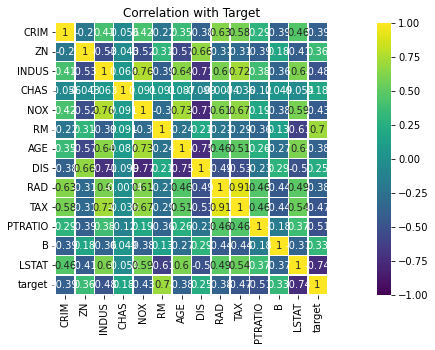

In [5]:
plt.figure(figsize=(18,5))
sns.heatmap(corr, square=True, annot=True, linewidths=.5, vmin=-1,
vmax=1, cmap='viridis')
plt.title("Correlation with Target", )
plt.show()

#As shown in the heatmap, lower status of the population(LSTAT) is the one which is inversly correlated with target.

In [6]:
X = (housing_df["LSTAT"]).values
y = (housing_df["target"]).values

In [7]:
regressor = LinearRegression()
regressor.fit(X.reshape(-1,1), y)

LinearRegression()

In [8]:
# The coefficient
print('Coefficient: ', regressor.coef_)
# The intercept
print('Intercept: ', regressor.intercept_)

Coefficient:  [-0.95004935]
Intercept:  34.5538408793831


Equation of the line = model.coef_ * x + model.intercept_

               hθ(x) = (-0.95 * x) + 34.5538

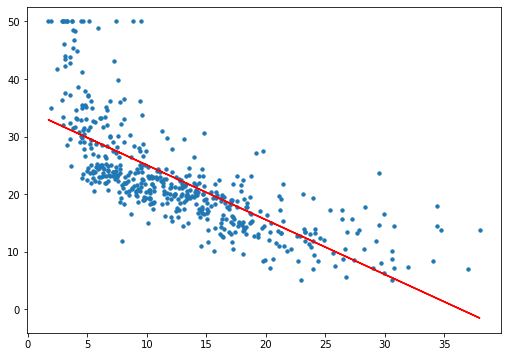

In [11]:
coef, intr = np.polyfit(X, y, 1)

fig = plt.gcf()
fig.set_size_inches(8.5, 6)
fig.savefig('test.png', dpi=100)

plt.scatter(X, y, marker = ".", s = 45)

plt.plot(X, coef*X+intr, color = "r")    

Q2) Another metric for performance evaluation
We have seen that LinearRegression() by sklearn provides a method called score which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. Another common performance metric is mean sum of squared error (MSE):

1𝑚∑𝑖=1𝑚⎛⎝⎜⎜𝜃𝑇𝑥(𝑖)⏟Prediction−𝑦(𝑖)⏟Target⎞⎠⎟⎟2 

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSE?

Important restriction: Do NOT use mean_squared_error module from sklearn.metrics.

In [12]:
X=housing_df[['CRIM','ZN','INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y=housing_df['target']
regressor.fit(X,y)
regressor.score(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


0.7406426641094095

In [13]:
m = regressor.coef_
b = regressor.intercept_
print(m)
print(b)


[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385090125


In [14]:
y_predict = regressor.predict(X)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [15]:
sum = 0 
n = len(X)

for i in range(n):
  sqr = (y_predict[i] - y[i]) ** 2
  sum+= sqr

sum/n
  

21.894831181729213

In [16]:
MSE = np.square(np.subtract(y,y_predict)).mean()
MSE
#This code is taken from the internet to just check whether my code is working or 

21.894831181729202

Q3) Splitting the dataset
In the lecture we did training and evaluation (score) on the whole Boston dataset. This is bad. Use the code in Week 1 Python Notebook to:

shuffle the data,
select 60% of the data as a training set (do the line fitting), 40% as a test set,

what is the score on the test data?

what is the mean squared error?

In [17]:
X=housing_df[['CRIM','ZN','INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y=housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.4)


In [18]:
regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [19]:
y_predict2 = regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [20]:
regressor.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


0.688260714253802

In [21]:
a = y_test.tolist()
b = y_predict2.tolist()

In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_predict2)

25.790362150702443

In [23]:
sum = 0 
n = len(a)

for i in range(n):
  sqr = (a[i] - b[i]) ** 2
  sum+= sqr

sum/n

25.790362150702443